### Linear Regression model for Duration of Eruption (min) and Waiting Time between Eruptions (min)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
first = pd.read_csv('truncated_waittimes.csv')
first.head()
first.dur.max()

344.0

In [3]:
data = first.loc[first["dur"]<= 10]

In [4]:
early = data.loc[data["year"]<= 1992]
early.count()

eruptionID             16071
geyser                 16071
eruption_time_epoch    16071
duration               16071
observer               16071
date                   16071
year                   16071
waiting_min            16071
waiting_hr             16071
dur                    16071
dtype: int64

In [5]:
late = data.loc[data["year"] >1992]
late.count()

eruptionID             2540
geyser                 2540
eruption_time_epoch    2540
duration               2540
observer               2540
date                   2540
year                   2540
waiting_min            2540
waiting_hr             2540
dur                    2540
dtype: int64

### Regression 1970 - 1992

In [6]:
# shape data
X = early["waiting_min"].values.reshape(-1, 1)
y = early["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (16071, 1) (16071, 1)


Text(0,0.5,'Duration of Eruption Minutes')

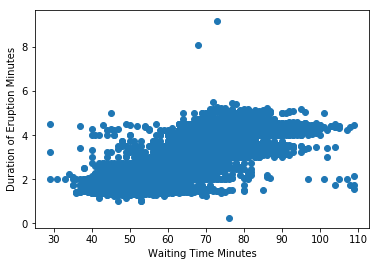

In [7]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [8]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.37196245844703385
R-squared (R2 ): 0.6736693904639421


In [12]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.6736693904639421

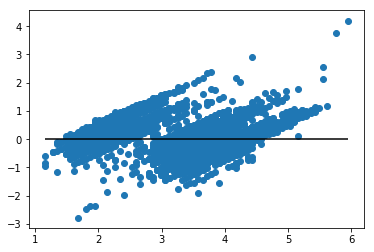

In [13]:
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [14]:
X = early["waiting_min"]
y = early["dur"]

from scipy.stats import linregress
linregress(X,y) 

LinregressResult(slope=0.06581769353093847, intercept=-1.1552621602150035, rvalue=0.8186389918229249, pvalue=0.0, stderr=0.0003642512218297824)

In [15]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[-1.14967161]
[[0.06572805]]


### Regression 1992-2019


In [16]:
# shape data
X = late["waiting_min"].values.reshape(-1, 1)
y = late["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (2540, 1) (2540, 1)


Text(0,0.5,'Duration of Eruption Minutes')

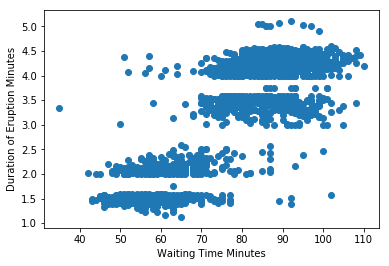

In [17]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [18]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.3715010512059392
R-squared (R2 ): 0.7125130302988406


In [22]:
# Call the `score` method on the model to show the r2 score
model.score(X_test, y_test)

0.7125130302988406

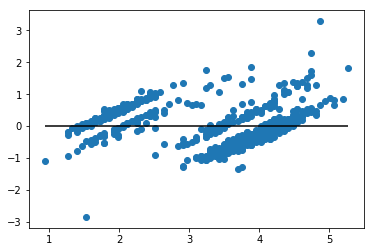

In [23]:
plt.scatter(predicted, predicted - y_test)
plt.hlines(y=0, xmin=predicted.min(), xmax=predicted.max())
plt.show()

In [45]:
X = late["waiting_min"]
y = late["dur"]

from scipy.stats import linregress
linregress(X,y) 

LinregressResult(slope=0.06554977801896024, intercept=-1.8163254109110376, rvalue=0.8549330650844785, pvalue=0.0, stderr=0.0007894809250731414)

In [24]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[-1.8225789]
[[0.06560789]]


### Linear Regression of Early (1970-1992) 2nd Mode

In [25]:
data= pd.read_csv('early.csv', index_col='eruptionID')

data.head()

,Unnamed: 0,geyser,eruption_time_epoch,duration,observer,date,year,waiting_min,waiting_hr,dur
eruptionID,,,,,,,,,,
23132,0,Old Faithful,10506540,4min,OFVCL-EV,5/2/1970 14:29,1970,71.0,1.18,4.00
23133,1,Old Faithful,10510800,1.5min,OFVCL-EV,5/2/1970 15:40,1970,50.0,0.83,1.50
23134,2,Old Faithful,10513800,4.25m,OFVCL-EV,5/2/1970 16:30,1970,67.0,1.12,4.25
23135,3,Old Faithful,10517820,4m,OFVCL-EV,5/2/1970 17:37,1970,81.0,1.35,4.00
23136,4,Old Faithful,10522680,1.75min,OFVCL-EV,5/2/1970 18:58,1970,43.0,0.72,1.75


In [26]:
data.drop(['Unnamed: 0'], axis=1)


,geyser,eruption_time_epoch,duration,observer,date,year,waiting_min,waiting_hr,dur
eruptionID,,,,,,,,,
23132,Old Faithful,10506540,4min,OFVCL-EV,5/2/1970 14:29,1970,71.0,1.18,4.00
23133,Old Faithful,10510800,1.5min,OFVCL-EV,5/2/1970 15:40,1970,50.0,0.83,1.50
23134,Old Faithful,10513800,4.25m,OFVCL-EV,5/2/1970 16:30,1970,67.0,1.12,4.25
23135,Old Faithful,10517820,4m,OFVCL-EV,5/2/1970 17:37,1970,81.0,1.35,4.00
23136,Old Faithful,10522680,1.75min,OFVCL-EV,5/2/1970 18:58,1970,43.0,0.72,1.75
23137,Old Faithful,10525260,4.5min,OFVCL-EV,5/2/1970 19:41,1970,70.0,1.17,4.50
23138,Old Faithful,10529460,4min,OFVCL-EV,5/2/1970 20:51,1970,66.0,1.10,4.00
23139,Old Faithful,10533420,4min,OFVCL-EV,5/2/1970 21:57,1970,69.0,1.15,4.00
23145,Old Faithful,10593480,4min,OFVCL-EV,5/3/1970 14:38,1970,70.0,1.17,4.00


In [27]:
early_mode = early.loc[(early["waiting_min"] >= 52) & (early["waiting_min"] <=100)]
early_mode.count()

eruptionID             13248
geyser                 13248
eruption_time_epoch    13248
duration               13248
observer               13248
date                   13248
year                   13248
waiting_min            13248
waiting_hr             13248
dur                    13248
dtype: int64

In [28]:
# shape data
X = early_mode["waiting_min"].values.reshape(-1, 1)
y = early_mode["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (13248, 1) (13248, 1)


Text(0,0.5,'Duration of Eruption Minutes')

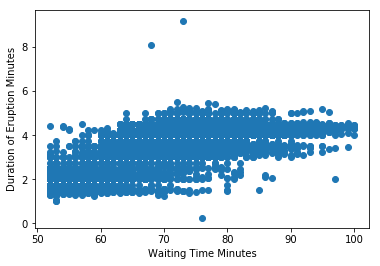

In [29]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [30]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.4080660812624976
R-squared (R2 ): 0.5022906575627955


In [34]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[-1.22775588]
[[0.06699167]]


### Linear Regression of  Late (1992-2019) 2nd Mode

In [35]:
data2= pd.read_csv('truncated_late.csv', index_col='eruptionID')
data2.head()

,year,waiting_min,dur
eruptionID,,,
1090262,1993,84.0,3.51
1090263,1993,80.0,4.16
1090264,1993,71.0,4.11
1090265,1993,89.0,4.00
1090266,1993,55.0,2.30


In [36]:
data3 = data2.loc[(data2["dur"] <10)]

In [37]:
late_mode = data3.loc[(data2["waiting_min"] >= 68) & (data3["waiting_min"] <=104)]
late_mode.count()

year           1744
waiting_min    1744
dur            1744
dtype: int64

In [38]:
# shape data
X = late_mode["waiting_min"].values.reshape(-1, 1)
y = late_mode["dur"].values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (1744, 1) (1744, 1)


Text(0,0.5,'Duration of Eruption Minutes')

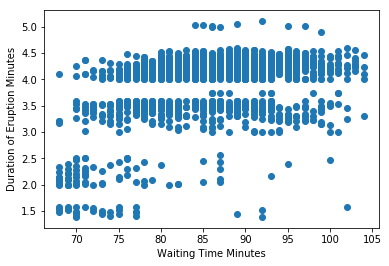

In [39]:
# Plot the data to see if linear relationship exists
plt.scatter(X, y)
plt.xlabel("Waiting Time Minutes")
plt.ylabel("Duration of Eruption Minutes")

In [40]:
# Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:
# Create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
# Fit the model to the training data. 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
# Calculate the mean_squared_error and the r-squared value
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.342662660359892
R-squared (R2 ): 0.19067333416292653


In [44]:
#To retrieve the intercept:
print(model.intercept_)
#For retrieving the slope:
print(model.coef_)

[1.1364597]
[[0.03241489]]


In [48]:
#waiting time vs year

init = pd.read_csv('duration.csv', index_col='eruptionID')
init.head()


,geyser,eruption_time_epoch,duration,observer,date,year,waiting_min,waiting_hr,dur
eruptionID,,,,,,,,,
23132,Old Faithful,10506540,4min,OFVCL-EV,5/2/1970 14:29,1970,71.0,1.18,4.00
23133,Old Faithful,10510800,1.5min,OFVCL-EV,5/2/1970 15:40,1970,50.0,0.83,1.50
23134,Old Faithful,10513800,4.25m,OFVCL-EV,5/2/1970 16:30,1970,67.0,1.12,4.25
23135,Old Faithful,10517820,4m,OFVCL-EV,5/2/1970 17:37,1970,81.0,1.35,4.00
23136,Old Faithful,10522680,1.75min,OFVCL-EV,5/2/1970 18:58,1970,43.0,0.72,1.75
